In [3]:
import re
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from fractions import Fraction
import pandas_helpers
import logging
from logging.config import dictConfig
import config
#import nba_py

In [40]:
os.makedirs(config.LOG_DIR, exist_ok=True)
dictConfig(config.LOGGING_CONFIG_DICT)

In [41]:
logging.info("reading attendance data")
attendance = pd.read_excel("../data/raw/nba_team_annual_attendance.xlsx")\
    .clean_column_names()\
    .parse_date_columns()\
    .deduplicate(["team", "starting_year"])


reading attendance data
clean_column_names
parse_date_columns
deduplicate


In [42]:
elo = pd.concat(map(pd.read_csv, glob.glob("../data/raw/nba_elo/nbaallelo.csv")))\
    .clean_column_names()\
    .parse_date_columns()\
    .deduplicate(['team_id','opp_id','date_game'])

clean_column_names
parse_date_columns
deduplicate


In [43]:
elo['year'] = elo['date_game'].apply(lambda x: x.year)
elo_okc = elo[elo['fran_id']=='Thunder']

In [44]:
elo_okc_annual = elo.deduplicate(['fran_id','year'])

deduplicate


In [45]:
attendance_okc = attendance[attendance['team']=='Thunder']

In [46]:
attendance_okc_annual = attendance_okc.deduplicate(["team", "starting_year"])

deduplicate
/home/jovyan/host/PycharmProjects/oklahoma_city_thunder/src/pandas_helpers.py:86: FutureWarning: 'team' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return self.groupby(key).agg(how_to_agg)
/home/jovyan/host/PycharmProjects/oklahoma_city_thunder/src/pandas_helpers.py:86: FutureWarning: 'starting_year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return self.groupby(key).agg(how_to_agg)


In [47]:
result = elo_okc_annual.merge_multi(attendance_okc_annual,left_on=['fran_id','year'], right_on=["team", "starting_year"] , how='inner')

multi index merge


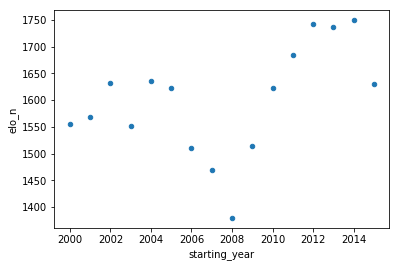

In [50]:
result.plot.scatter(x='starting_year',y='elo_n')

In [51]:
result.to_csv("./attend_elo_combined.csv")